# Modelling

Overall Procedure
1. import relevant libraries
2. import require csv into df
3. Take Model Features from train_X Dataframe columns
4. Modelling

##  Import libraries

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

import warnings
from warnings import filterwarnings

import pickle
# from google.colab import files



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.datasets import make_classification
from xgboost.sklearn import XGBClassifier

Take csv from pat github

##  Import CSV

In [6]:
url = 'https://raw.githubusercontent.com/chattrapatchua/dsi10_project4/master/data/final_X_training.csv'
train_X = pd.read_csv(url, error_bad_lines=False)

In [7]:
url = 'https://raw.githubusercontent.com/chattrapatchua/dsi10_project4/master/data/final_y_training.csv'
train_y = pd.read_csv(url)

In [8]:
url = 'https://raw.githubusercontent.com/chattrapatchua/dsi10_project4/master/data/final_X_testing.csv'
test_X = pd.read_csv(url)

In [9]:
url = 'https://raw.githubusercontent.com/chattrapatchua/dsi10_project4/master/data/final_y_testing.csv'
test_y = pd.read_csv(url,header=None)

In [10]:
url = 'https://raw.githubusercontent.com/chattrapatchua/dsi10_project4/master/data/final_test.csv'
test = pd.read_csv(url)

In [11]:
display(train_X.head(),test_X.head(),train_y.head(),test_y.head(),test.head())

,Latitude,Longitude,Tavg,DewPoint,ResultSpeed,ResultDir,Tavg_rolling3day,Tavg_rolling7day,Tavg_rolling14day,DewPoint_rolling3day,DewPoint_rolling7day,DewPoint_rolling14day,days_since_rain
0,41.868077,-87.666901,71.5,58.0,1.55,23.0,75.333333,73.285714,73.285714,60.666667,61.214286,60.678571,3.0
1,41.659112,-87.538693,73.0,66.5,2.00,23.5,76.833333,73.357143,71.678571,64.166667,59.357143,57.535714,0.0
2,41.763733,-87.742302,75.0,59.0,9.85,23.0,71.000000,67.142857,70.750000,59.166667,55.000000,57.928571,2.0
3,41.659112,-87.538693,55.0,46.5,7.85,3.0,60.166667,62.071429,64.035714,47.333333,49.571429,48.535714,0.0
4,41.932094,-87.700117,80.0,70.5,5.40,24.5,80.166667,78.214286,77.535714,65.666667,60.357143,59.821429,0.0


,Latitude,Longitude,Tavg,DewPoint,ResultSpeed,ResultDir,Tavg_rolling3day,Tavg_rolling7day,Tavg_rolling14day,DewPoint_rolling3day,DewPoint_rolling7day,DewPoint_rolling14day,days_since_rain
0,41.961743,-87.760070,68.5,56.0,4.25,17.0,67.500000,66.785714,68.250000,54.166667,51.642857,53.000000,1
1,41.732984,-87.649642,78.0,64.5,4.05,10.0,80.666667,78.214286,75.785714,67.166667,63.142857,61.250000,7
2,41.803423,-87.642984,71.5,55.5,0.60,23.0,69.833333,70.785714,68.357143,56.833333,59.357143,57.000000,1
3,41.662014,-87.724608,75.0,59.0,9.85,23.0,71.000000,67.142857,70.750000,59.166667,55.000000,57.928571,2
4,41.947227,-87.671457,67.0,50.5,6.30,5.5,69.500000,68.571429,64.678571,56.000000,55.428571,51.821429,2


,WnvPresent
0,0
1,0
2,0
3,0
4,0


,0
0,0
1,0
2,0
3,0
4,0


,Id,Latitude,Longitude,Tavg,DewPoint,ResultSpeed,ResultDir,Tavg_rolling3day,Tavg_rolling7day,Tavg_rolling14day,DewPoint_rolling3day,DewPoint_rolling7day,DewPoint_rolling14day,days_since_rain
0,1,41.95469,-87.800991,75.0,55.5,9.15,18.0,71.5,74.785714,70.25,58.5,64.571429,58.607143,1
1,2,41.95469,-87.800991,75.0,55.5,9.15,18.0,71.5,74.785714,70.25,58.5,64.571429,58.607143,1
2,3,41.95469,-87.800991,75.0,55.5,9.15,18.0,71.5,74.785714,70.25,58.5,64.571429,58.607143,1
3,4,41.95469,-87.800991,75.0,55.5,9.15,18.0,71.5,74.785714,70.25,58.5,64.571429,58.607143,1
4,5,41.95469,-87.800991,75.0,55.5,9.15,18.0,71.5,74.785714,70.25,58.5,64.571429,58.607143,1


In [12]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape, test.shape

((14932, 13), (14932, 1), (2627, 13), (2627, 1), (116293, 14))

In [13]:
test_y.columns,train_y.columns

(Int64Index([0], dtype='int64'), Index(['WnvPresent'], dtype='object'))

In [14]:
test_y.rename(columns={0:'WnvPresent'},inplace=True)
test_y.columns,train_y.columns

(Index(['WnvPresent'], dtype='object'), Index(['WnvPresent'], dtype='object'))

##  Model Feature selection

In [15]:
cols = train_X.columns.tolist()
cols

['Latitude',
 'Longitude',
 'Tavg',
 'DewPoint',
 'ResultSpeed',
 'ResultDir',
 'Tavg_rolling3day',
 'Tavg_rolling7day',
 'Tavg_rolling14day',
 'DewPoint_rolling3day',
 'DewPoint_rolling7day',
 'DewPoint_rolling14day',
 'days_since_rain']

In [16]:
X_train = train_X[cols]
X_test  = test_X[cols]

y_train = train_y[['WnvPresent']]
y_test  = test_y[['WnvPresent']]

#pred
test_submit    = test[cols]  

##  Modelling using Gridsearching
ALL THE FUNCTIONS COMBINE UNDER 'GRID_SEARCH' 

In [17]:
def grid_searcher( X_train, X_test, y_train, y_test,test_submit, model):
    
    
    
    full_name_dict = {
                      'lr'       : 'Logistic Regression',
                      'dt'       : 'Decision Tree Classifier',
                      'rf'       : 'Random Forest Classifier', 
                      'ada'      : 'AdaBoost Classifier',
                      'gb'       : 'Gradient Boosting Classifier',
                      'xgb'      : 'XG Boost Classifier'
                      }
    
    param_dict = {'lr' : {},
                  'dt' : {'dt__max_depth': [3,5],
                          'dt__min_samples_split': [5,10],
                          'dt__min_samples_leaf': [2,3]},
                  
                  'rf' : {'rf__n_estimators': [100],
                          'rf__max_depth': [None, 1, 2],
                          'rf__min_samples_split': [5,10],
                          'rf__min_samples_leaf': [2,3]},
                  
                  'ada':{'ada__n_estimators':[30,50,80,100],
                         'ada__algorithm': ['SAMME', 'SAMME.R'],
                         'ada__learning_rate': [0.8,.9, 1.]},
                  
                  'gb':{'gb__max_depth': [2,3,4],
                        'gb__n_estimators': [100, 125, 150],
                        'gb__learning_rate': [.08, .1, .12]},
                  
                  'xgb':{'xgb__max_depth':[2,3],
                         'xgb__learning_rate':[0.001,0.01,0.1],
                         'xgb__n_estimators':[50,100]                      
                  }
                  
                  }
                  
    model_dict = {
                  'lr' : LogisticRegression(solver='lbfgs'), 
                  'dt' : DecisionTreeClassifier(),
                  'rf' : RandomForestClassifier(),
                  'ada': AdaBoostClassifier(),
                  'gb' : GradientBoostingClassifier(),
                 'xgb' : XGBClassifier()
                  }

    #choosing model for modelling
    model_dict_1 ={
                  'lr' : LogisticRegression,
                  'dt' : DecisionTreeClassifier,
                  'rf' : RandomForestClassifier,
                  'ada': AdaBoostClassifier,
                  'gb' : GradientBoostingClassifier,
                  'xgb': XGBClassifier
                  }
    
    pipe = Pipeline([(model, model_dict[model])])
    
    
    pipe_params = param_dict[model]
    
    grid = GridSearchCV(pipe,
           param_grid=pipe_params,
           cv=10)
        
    grid.fit(X_train, y_train.values.ravel())
    train_score = grid.score(X_test,y_test)

    string_remove = model + '__'
    parameter = dict((k.replace(string_remove,''),v) for k,v in grid.best_params_.items())
    
    choosen_model = model_dict_1[model](**parameter).fit(X_train,y_train)   
    pred = choosen_model.predict(X_test)
    test_score =roc_auc_score(y_test,pred)
    print_out(full_name_dict[model],parameter,train_score,test_score,choosen_model)


    pred_test = choosen_model.predict_proba(test_submit)
    
    submission_df(pred_test,model)
    save_model(choosen_model,model)
    
    return 
    


In [18]:
#Functions to Plot ROC curve with AUC scoring
# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

def Calculate(pred_df,thresholds):
    # Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
    tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
    fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
    
    return tpr_values,fpr_values

def ROC_curve(y_test, X_test,model):
    
    pred_proba = [i[1] for i in model.predict_proba(X_test)]

    pred_df = pd.DataFrame({'true_values': y_test['WnvPresent'],
                           'pred_probs': pred_proba})

    roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

    # Create figure.
    plt.figure(figsize = (10,7))

    # Create threshold values. (Dashed red line in image.)
    thresholds = np.linspace(0, 1, 200)
    
    tpr_values,fpr_values = Calculate(pred_df,thresholds)
    
    # Plot ROC curve.
    plt.plot(fpr_values, # False Positive Rate on X-axis
             tpr_values, # True Positive Rate on Y-axis
             label='ROC Curve')

    # Plot baseline. (Perfect overlap between the two populations.)
    plt.plot(np.linspace(0, 1, 200),
             np.linspace(0, 1, 200),
             label='baseline',
             linestyle='--')

    # Label axes.
    plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
    plt.ylabel('Sensitivity', fontsize=18)
    plt.xlabel('1 - Specificity', fontsize=18)

    # Create legend.
    plt.legend(fontsize=16);
              
def confusion(X_test,y_test,model):
    pred = model.predict(X_test)
    df_confusion = pd.DataFrame(confusion_matrix(y_test,pred), 
             index = ['Predict {}'.format('WnV Not Present'), 'Predict {}'.format('WnV Present')],
             columns = ['actual  {}'.format('WnV Not Present'), 'actual  {}'.format('WnV Present')]
            )
    display(df_confusion)
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    
    accuracy          = round((tp+tn)/(tp+fp+tn+fn),4)*100
    misclassification = round((fp+fn)/(tp+fp+tn+fn),4)*100
    precision         = round(tp/(tp+fp),4) * 100
    recall            = round(tp/(tp+fn),4)
    specificity       = round(tn/(tn+fp),4)
    
    print('** Accuracy %: {}% **'     .format(accuracy))
    print('Misclassification %: {}&'.format(misclassification))
    print('Precision %: {}'           .format(round(tp/(tp+fp),4)))
    print('Recall: {}'                .format(round(tp/(tp+fn),4)))
    print('Specificity: {}'           .format(round(tn/(tn+fp),4)))
    
    return accuracy, misclassification , precision, recall, specificity
              
combine_info=[]
def print_out(gs,best_prams,train_score,test_score,model):
    print('''
    ###########################
    {} model
    ###########################    
    '''.format(gs))
    print("Best params: {}".format(best_prams))
    print('Train score: {}, Test score {}'.format(train_score, test_score))

    accuracy, misclassification , precision, recall, specificity = confusion(X_test,y_test,model)
    
    ROC_curve(y_test,X_test,model)
    
    ls = [gs,train_score,test_score,accuracy,misclassification,precision, recall, specificity]
    combine_info.append(ls)
    
    


              

In [19]:
def submission_df(predict,model_type='submission'):
    df = pd.DataFrame(test['Id'])
    df['WnvPresent'] = predict[:,1]
#     df.set_index(['Id'], inplace = True)
    name = model_type + '.csv'
    df.to_csv(name, index=False)
#     files.download(name)

def save_model(choosen_model,model_type='submission'):
    filename = model_type + '.pkl'
    filesave = open(filename, 'wb')
    pickle.dump(choosen_model, filesave)
    filesave.close()
#     files.download(filename)


ALL THE FUNCTIONS COMBINE UNDER 'GRID_SEARCH' 

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number 


    ###########################
    Logistic Regression model
    ###########################    
    
Best params: {}
Train score: 0.6433193757137419, Test score 0.649524574795768


,actual WnV Not Present,actual WnV Present
Predict WnV Not Present,1574,915
Predict WnV Present,46,92


** Accuracy %: 63.42% **
Misclassification %: 36.58&
Precision %: 0.0914
Recall: 0.6667
Specificity: 0.6324


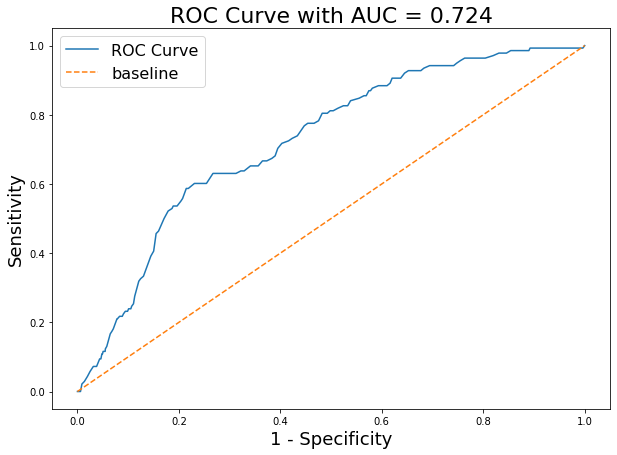

In [20]:
grid_searcher(X_train, X_test, y_train, y_test,test_submit,'lr')


    ###########################
    Decision Tree Classifier model
    ###########################    
    
Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Train score: 0.7293490673772364, Test score 0.7305462877239564


,actual WnV Not Present,actual WnV Present
Predict WnV Not Present,1815,674
Predict WnV Present,37,101


** Accuracy %: 72.92999999999999% **
Misclassification %: 27.07&
Precision %: 0.1303
Recall: 0.7319
Specificity: 0.7292


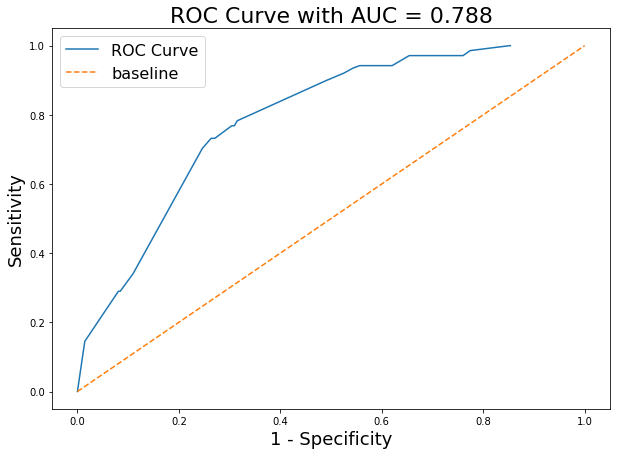

In [21]:
grid_searcher(X_train, X_test, y_train, y_test,test_submit,'dt')

/Users/YLChua/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



    ###########################
    Random Forest Classifier model
    ###########################    
    
Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Train score: 0.8679101636848116, Test score 0.603165522501907


,actual WnV Not Present,actual WnV Present
Predict WnV Not Present,2227,262
Predict WnV Present,95,43


** Accuracy %: 86.41% **
Misclassification %: 13.59&
Precision %: 0.141
Recall: 0.3116
Specificity: 0.8947


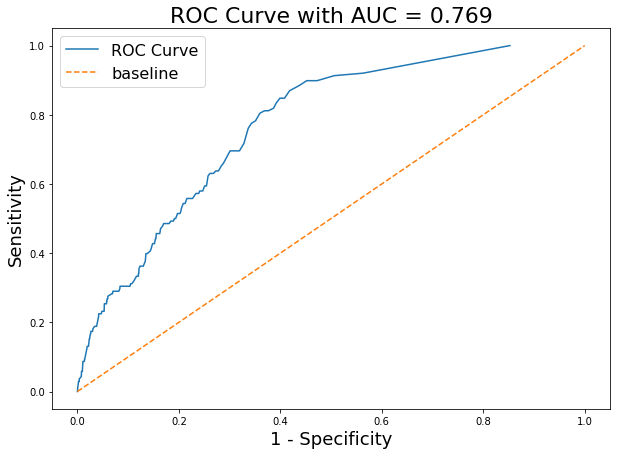

In [22]:
grid_searcher(X_train, X_test, y_train, y_test,test_submit,'rf')

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



    ###########################
    AdaBoost Classifier model
    ###########################    
    
Best params: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}
Train score: 0.7460982108869433, Test score 0.7325405698115185


,actual WnV Not Present,actual WnV Present
Predict WnV Not Present,1861,628
Predict WnV Present,39,99


** Accuracy %: 74.61% **
Misclassification %: 25.39&
Precision %: 0.1362
Recall: 0.7174
Specificity: 0.7477


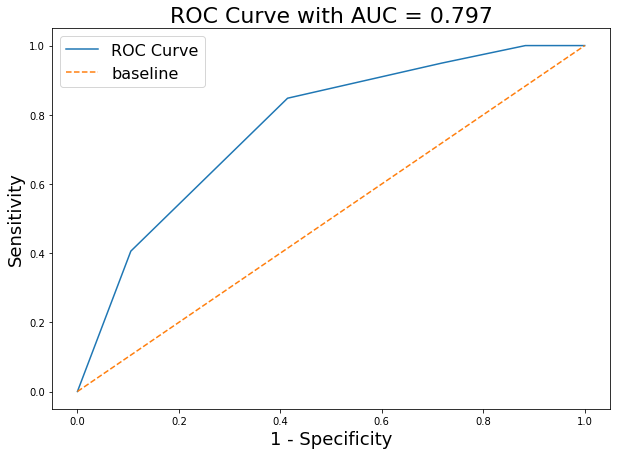

In [23]:
grid_searcher(X_train, X_test, y_train, y_test,test_submit,'ada')

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



    ###########################
    Gradient Boosting Classifier model
    ###########################    
    
Best params: {'learning_rate': 0.12, 'max_depth': 4, 'n_estimators': 150}
Train score: 0.8252759802055577, Test score 0.6990337193797638


,actual WnV Not Present,actual WnV Present
Predict WnV Not Present,2091,398
Predict WnV Present,61,77


** Accuracy %: 82.53% **
Misclassification %: 17.47&
Precision %: 0.1621
Recall: 0.558
Specificity: 0.8401


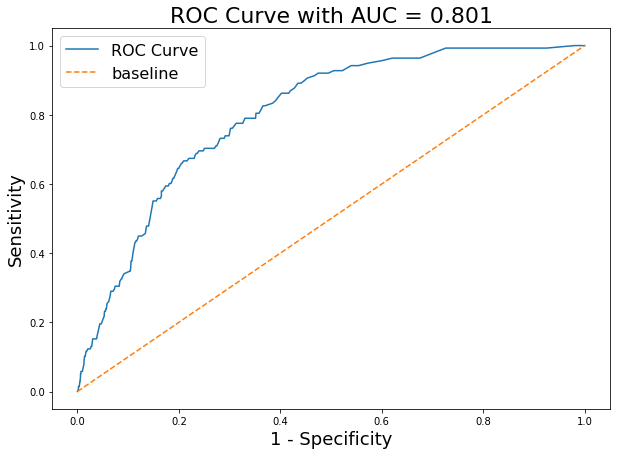

In [24]:
grid_searcher(X_train, X_test, y_train, y_test,test_submit,'gb')

/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/YLChua/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



    ###########################
    XG Boost Classifier model
    ###########################    
    
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Train score: 0.7681766273315569, Test score 0.73734722634665


,actual WnV Not Present,actual WnV Present
Predict WnV Not Present,1921,568
Predict WnV Present,41,97


** Accuracy %: 76.82% **
Misclassification %: 23.18&
Precision %: 0.1459
Recall: 0.7029
Specificity: 0.7718


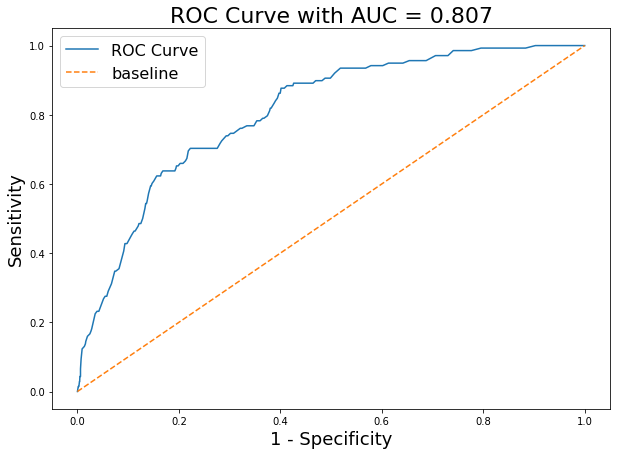

In [25]:
grid_searcher(X_train, X_test, y_train, y_test,test_submit,'xgb')

In [26]:
combine_info

[['Logistic Regression',
  0.6433193757137419,
  0.649524574795768,
  63.42,
  36.58,
  9.139999999999999,
  0.6667,
  0.6324],
 ['Decision Tree Classifier',
  0.7293490673772364,
  0.7305462877239564,
  72.92999999999999,
  27.07,
  13.03,
  0.7319,
  0.7292],
 ['Random Forest Classifier',
  0.8679101636848116,
  0.603165522501907,
  86.41,
  13.59,
  14.099999999999998,
  0.3116,
  0.8947],
 ['AdaBoost Classifier',
  0.7460982108869433,
  0.7325405698115185,
  74.61,
  25.39,
  13.62,
  0.7174,
  0.7477],
 ['Gradient Boosting Classifier',
  0.8252759802055577,
  0.6990337193797638,
  82.53,
  17.47,
  16.21,
  0.558,
  0.8401],
 ['XG Boost Classifier',
  0.7681766273315569,
  0.73734722634665,
  76.82,
  23.18,
  14.59,
  0.7029,
  0.7718]]

In [33]:
column = ['model','train_score','test_score','accuracy','misclassification','precision', 'recall', 'specificity']
df = pd.DataFrame(combine_info, columns=column)
df.set_index('model',drop=True,inplace = True)
df

,train_score,test_score,accuracy,misclassification,precision,recall,specificity
model,,,,,,,
Logistic Regression,0.643319,0.649525,63.42,36.58,9.14,0.6667,0.6324
Decision Tree Classifier,0.729349,0.730546,72.93,27.07,13.03,0.7319,0.7292
Random Forest Classifier,0.867910,0.603166,86.41,13.59,14.10,0.3116,0.8947
AdaBoost Classifier,0.746098,0.732541,74.61,25.39,13.62,0.7174,0.7477
Gradient Boosting Classifier,0.825276,0.699034,82.53,17.47,16.21,0.5580,0.8401
XG Boost Classifier,0.768177,0.737347,76.82,23.18,14.59,0.7029,0.7718
